# Computational methods in Physics
## Week 6
#### Prof. Michael Wood-Vasey
##### [based on materials from Prof. Brian D'Urso]
##### University of Pittsburgh, Department of Physics and Astronomy

## Linear algebra

## Overview
This week's topics:
* Eigenvalues and Eigenvectors
* Root finding
* Multidimensional root finding and minimization.
* Curve fitting.

## Root Finding

### Root Finding
How can we use numerical techniques to solve $f(x)=0$ for $x$?  
We will use 3 methods:

* Bisection method:
repeated bracketing.
* Newton-Raphson method:
linear approximation with analytical derivative.
* Secant method:
linear approximation with numerical derivative.

### Bisection Method
There is little more than repeated bracketing to our first root-finding method, bisection:
1. Start with the initial bracket $\left[x_1^{(1)}, x_2^{(1)}\right]$ with $f\left(x_1^{(1)}\right)f\left(x_2^{(1)}\right) < 0$.
Assume $x_1^{(1)} < x_2^{(1)}$ without loss of generality.
2. Guess the location of the root as the midpoint:
$x_0^{(1)}=\left(x_1^{(1)}+x_2^{(1)}\right)/2$.
3. If $f\left(x_0^{(1)}\right)$ has the same sign as $f\left(x_1^{(1)}\right)$,  

set the new bracket to $\left[x_1^{(2)}, x_2^{(2)}\right]=\left[x_0^{(1)}, x_2^{(1)}\right]$,  

else set it to $\left[x_1^{(2)}, x_2^{(2)}\right]=\left[x_1^{(1)}, x_0^{(1)}\right]$.
4. The location of the root is now known to precision $\left|x_1^{(2)}-x_2^{(2)}\right|$. If this is not satifactory, go back to step 2 to obtain the next bracket $\left[x_1^{(3)}, x_2^{(3)}\right]$.

### Bisection Method (2)
![Bisection Illustration](figures/bisection.png)

### Bisection Method (3)

* For continuous functions, this method is guaranteed to converge to the root.
* At each step, the error is halved.
* The method is said to be linearly convergent, because the number of correct digits in the answer (the location of the root) grows linearly with the number of iterations (one decimal digit every $\log_2(10)$ iterations).

### Newton-Raphson Method
The idea of the Newton-Raphson method is to use information about the derivative of the function to guide the choice of a sequence of points converging to the root.
1. Start from the initial guess $x^{(1)}$.
2. Approximate the function around $x^{(1)}$ by the fist two terms of its Taylor expansion
(i.e., as the straight line through $\left[x^{(1)}, f\left(x^{(1)}\right)\right]$ with the same slope as the curve $f(x)$):
$f(x)\approx f\left(x^{(1)}\right) + f^\prime \left(x-x^{(1)}\right) + \cdots$.
An approximate guess ($x^{(2)}$) for the root is obtained by setting $f(x) = 0$, yielding
$x^{(2)} = x^{(1)} - \frac{f\left(x^{(1)}\right)}{f^\prime\left(x^{(1)}\right)}$.
3. Compare the value of $f\left(x^{(1)}\right)$ with a predetermined tolerance to decide whether to stop or go back to step 2 and obtain $x^{(3)}$.

### Newton-Raphson Method (2)
![Newton-Raphson Illustration](figures/newtons.png)

### Newton-Raphson Method (3)

* If the function is sufficiently linear near the last guess, $x^{(last)}$,
the precision of the location of the root is approximately $\left|f\left(x^{(last)}\right)/f^\prime\left(x^{(last)}\right)\right|$.
* The advantage of this method is that it converges quadratically.
The number of correct digits in the answer approximately doubles with each iteration.
* This method is not guaranteed to converge.
A local extremum will send the next guess towards infinity.
* Possible to combine methods by bracketing.
Use bisection if Newton-Raphson goes outside bracketed range.

### Secant Method

* The secant method is a close relative of the Newton-Raphson method.
* Does not require the explicit knowledge of the derivative $f^\prime(x)$.
* Derivative is approximated by tracing a straight line through the last two points examined.
* Converges more slowly than Newton-Raphson.
Order of convergence is the golden ratio: $\phi = 1.618\cdots$.
Number of correct digits is multiplied by $\phi$ at each iteration.
* Similar weaknesses to Newton-Raphson.

### Secant Method (2)
![Secant Illustration](figures/secant.png)

### Secant Method (3)
1. Start from two initial guesses, $x^{(1)}$ and $x^{(2)}$.
2. Approximate the derivative at $x^{(2)}$ by the slope of the line that joins $\left[x^{(1)}, f\left(x^{(1)}\right)\right]$ to $\left[x^{(2)}, f\left(x^{(2)}\right)\right]$:
$f^\prime\left(x^{(2)}\right) = \frac{f\left(x^{(2)}\right)-f\left(x^{(1)}\right)}{x^{(2)}-x^{(1)}}$.
* Take a Newton-Raphson step to find $x^{(3)}$:
$x^{(3)} = x^{(2)}-f\left(x^{(2)}\right)\frac{x^{(2)}-x^{(1)}}{f\left(x^{(2)}\right)-f\left(x^{(1)}\right)}$.
3. Compare $f\left(x^{(3)}\right)$ with the tolerance to decide whether to continue the iteration.
If needed, repeat step 2 to get the next value with:
$x^{(i)} = x^{(i-1)}-f\left(x^{(i-1)}\right)\frac{x^{(i-1)}-x^{(i-2)}}{f\left(x^{(i-1)}\right)-f\left(x^{(i-2)}\right)}$.
Estimate precision as in the Newton-Raphson method.

### Newton-Raphson Method Implementation

In [138]:
def Newton(f, dfdx, x, eps=1.0E-7, N=100):
  for n in range(N):
    y = f(x)
    print(x, y, n)
    if abs(y) < eps: break
    x -= y/dfdx(x)
  return x, y, n

Note: `f` and `dfdx` are functions which return the value and derivative of the function of which you want to find a root.

### Newton-Raphson Method Example
Solve $\sin(x)-0.75=0$

In [139]:
import math

def g(x):
  return math.sin(x) - 0.75

def dgdx(x):
  return math.cos(x)

Newton(g, dgdx, 0.0)


0.0 -0.75 0
0.75 -0.06836123997666577 1
0.843429383560097 -0.0030722772211968508 2
0.8480500077342846 -7.984434166941057e-06 3
0.8480620788988701 -5.4642068647581254e-11 4


(0.8480620788988701, -5.4642068647581254e-11, 4)

### SciPy Root Finding Routines
The SciPy optimize sub-package `scipy.optimize` provides several root-finding routines. An overview of the module is provided by the help command:
```
help(scipy.optimize)
```
Methods for finding roots of a given function object:

* `brentq`: quadratic interpolation Brent method.
* `brenth`: Brent method, modified by Harris with hyperbolic extrapolation.
* `ridder`: Ridder's method.
* `bisect`: Bisection method.
* `newton`: Secant method or Newton's method.

#### Examples: Solving Eigensystems
Solve for the principle axes of a cube,
where the moment of inertia tensor $\mathbf{I}$ is diagonal.
* Solve $\mathbf{I}\vec{\omega}= \lambda\vec{\omega}$ for eigenvectors $\vec{\omega}$ and eigenvalues $\lambda$.
* Setup:

In [140]:
import numpy as np
I = np.array([[ 2./3,-1./4,-1./4],
              [-1./4, 2./3,-1./4],
              [-1./4,-1./4, 2./3]])

* Solve eigensystem:

In [141]:
evalues, evectors = np.linalg.eig(I)

In [142]:
print("Eigenvectors: ")
print(evectors)

print("Eigenvalues: ")
print(evalues)

Eigenvectors: 
[[ 0.81649658 -0.57735027  0.44507153]
 [-0.40824829 -0.57735027 -0.81535403]
 [-0.40824829 -0.57735027  0.3702825 ]]
Eigenvalues: 
[ 0.91666667  0.16666667  0.91666667]


* Evaluate difference between RHS and LHS of $\mathbf{I}\vec{\omega}= \lambda\vec{\omega}$:

In [143]:
LHS = np.dot(I, evectors[:, 0])
RHS = evalues[0] * evectors[:, 0]
LHS - RHS

array([  1.11022302e-16,  -1.11022302e-16,  -1.66533454e-16])

Excellent, the LHS and RHS look equal to something approaching machine precision.

#### Multidimensional Nonlinear Root Finding
The general problem of finding roots of multiple nonlinear simultaneous equations $f(x, y)$ and $g(x, y)$ is difficult:

![](figures/multidimensional_root_finding.png)

#### Multidimensional Newton-Raphson
Consider $N$ nonlinear functions of $N$ variables, $F_i(x_1, x_2, \ldots , x_N)$.  
Find the $\vec{x}$ which gives $F_i(\vec{x}) = 0$
 for all $i$.
* Taylor expansion:
\begin{equation*}
\vec{F}(\vec{x}+ \delta\vec{x}) = \vec{F}(\vec{x}) + \mathbf{J}\cdot \delta\vec{x} + \mathcal{O}(\delta\vec{x}^2)
\end{equation*}
where $\mathbf{J}$ is the Jacobian matrix with $J_{ij} = \frac{\partial F_i}{\partial x_j}$.
* Set $\vec{F}(\vec{x}+ \delta\vec{x})=0$ to get an approximate solution:
\begin{equation*}
\mathbf{J}\cdot \delta\vec{x} = -\vec{F}(\vec{x})
\end{equation*}
* Solve for $\delta\vec{x}$ to get the Newton-Raphson step:
\begin{equation*}
\vec{x}_{\rm new} = \vec{x}_{\rm old} + \delta\vec{x}
\end{equation*}
* Need to use matrix mathods (e.g. LU decomposition) to get $\delta\vec{x}$.

#### Function Minimization
What if the problem is to minimize a function instead of finding a zero?
* There are routines similar to the bisection and Newton-Raphson methods for minimization.
* Multidimensional minimization (optimization) is better behaved than multidimensional root finding.
* Many Scipy optimization routines:
  * Online documentation:
  http://docs.scipy.org/doc/scipy/reference/optimize.html
  * Python help:
  `help(scipy.optimize)`
  * Many trade-offs between speed, memory use, robustness, \ldots
  * Ideal technique is problem-dependent.

In [144]:
import scipy.optimize
help(scipy.optimize)

Help on package scipy.optimize in scipy:

NAME
    scipy.optimize

DESCRIPTION
    Optimization and root finding (:mod:`scipy.optimize`)
    
    .. currentmodule:: scipy.optimize
    
    Optimization
    
    Local Optimization
    ------------------
    
    .. autosummary::
       :toctree: generated/
    
       minimize - Unified interface for minimizers of multivariate functions
       minimize_scalar - Unified interface for minimizers of univariate functions
       OptimizeResult - The optimization result returned by some optimizers
       OptimizeWarning - The optimization encountered problems
    
    The `minimize` function supports the following methods:
    
    .. toctree::
    
       optimize.minimize-neldermead
       optimize.minimize-powell
       optimize.minimize-cg
       optimize.minimize-bfgs
       optimize.minimize-newtoncg
       optimize.minimize-lbfgsb
       optimize.minimize-tnc
       optimize.minimize-cobyla
       optimize.minimize-slsqp
       optimiz

### Curve Fitting

#### Curve Fitting
Find the parameters $\vec{a}=(a_1, a_2, \ldots, a_M)$ that make the function $f(x, \vec{a})$ fit the data $(x_i, y_i)$ with standard deviations (errors) $\sigma_i$ as well as possible.
* A common approach is to adjust $\vec{a}$ to minimize the sum of the squares of the weighted errors, called $\chi^2$:
\begin{equation*}
\chi^2 = \sum_{i=0}^{N} \left[\frac{y_i - f(x_i, \vec{a})}{\sigma_i}\right]^2
\end{equation*}
* For normally distributed data,
 minimum $\chi^2 \Rightarrow$ maximum likelihood.
* $1/\sigma_i^2$ = weighting $\Rightarrow$ large errors contribute least.
* Smaller $\chi^2 \Rightarrow$ better fit.
* $\chi^2 \approx N - M =$ \# degrees freedom, good.
* Good fit: misses $\sim 1/3$ of points.
* $\chi^2 = 0 \Rightarrow$ theory passes through all data points.

#### Example: Linear Regression
Fitting data to a line (called Simple Linear Regression) is particularly easy.   
e.g. fit a line, $y = m * x + c * 1$, through some noisy data-points:
* Setup and make some data:

In [145]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

* By inspecting or plotting, we see that the line should have a slope of roughly $1$ and cut the y-axis at $-1$.

(-2, 3)

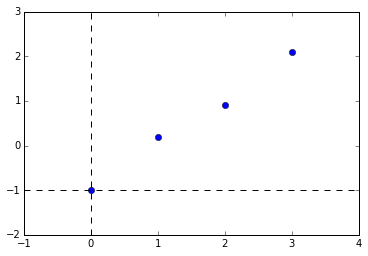

In [146]:
plt.plot(x,       y, linestyle='' , marker='o', color='blue', label='data')
plt.axhline(-1, linestyle='dashed', color='black')
plt.axvline(0, linestyle='dashed', color='black')
plt.xlim(-1,4)
plt.ylim(-2,3)

* We can rewrite the line equation as $\mathbf{A}\vec{p} = \vec{y}$,  
 where `A = [[x 1]]` and `p = [[m], [c]]`.  
Now use `lstsq` to solve for `p`:

In [147]:
A = np.column_stack([x, np.ones(len(x))])
m, c = np.linalg.lstsq(A, y)[0]

In [148]:
np.linalg.lstsq(A, y)[0]

array([ 1.  , -0.95])

#### Example: Linear Regression, Plotting
* Plot the data along with the fitted line:

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt

(-2, 3)

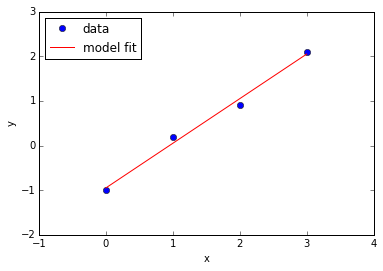

In [150]:
plt.plot(x,       y, linestyle='' , marker='o', color='blue', label='data')
plt.plot(x, m*x + c, linestyle='-', color='red', label='model fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='upper left')
plt.xlim(-1,4)
plt.ylim(-2,3)

### Linear Regression means linear in the *coefficients*.
### It doesn't have to be a straight line.

Let's fit $y = a + b x + c x^2$

In [151]:
import numpy as np
x = np.array([0, 0.5, 1, 1.2, 2, 2.7, 3])
(a, b, c) = (1.5, 2, 4)
y = np.polyval([c,b,a], x)  # polyval expects coefficients from largest to smallest power of x
# Add some noise
(mu, sigma) = (0, 1)
y += np.random.normal(mu, sigma, size=len(x))

In [152]:
print(y)

[  1.15135305   3.65236471   9.7132333    9.30642822  20.68455283
  35.05625841  44.08908023]


In [153]:
A = np.column_stack([x**2, x, np.ones(len(x))])
(fit_c, fit_b, fit_a) = np.linalg.lstsq(A, y)[0]

In [154]:
print(fit_c, fit_b, fit_a)

3.85319802223 2.2765444232 1.63295974172


In [155]:
%matplotlib inline
import matplotlib.pyplot as plt

(-1, 4)

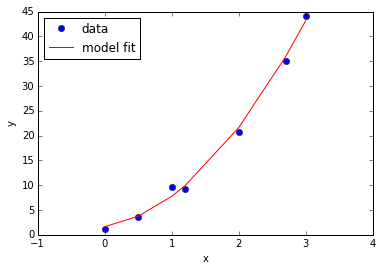

In [156]:
fit_y = np.polyval([fit_c, fit_b, fit_a], x)
plt.plot(x,     y, linestyle='' , marker='o', color='blue', label='data')
plt.plot(x, fit_y, linestyle='-', color='red', label='model fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='upper left')
plt.xlim(-1,4)
# plt.ylim(-2,3)

And just to really drive the point home, let's fit $y = a + b x + c \sin(x)$


In [157]:
def f_b_sin(x, a, b, c):
    return a + b*x + c * np.sin(x)

x = np.linspace(-10, 10, 101)
(a, b, c) = (1.5, 1, 2)
y = f_b_sin(x, a, b, c)

# Add some noise
(mu, sigma) = (0, 1)
y += np.random.normal(mu, sigma, size=len(x))

In [158]:
A = np.column_stack([np.sin(x), x, np.ones(len(x))])
(fit_c, fit_b, fit_a) = np.linalg.lstsq(A, y)[0]
print(fit_c, fit_b, fit_a)

2.32420037038 1.03669482917 1.40227446527


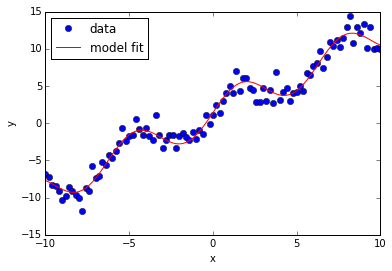

In [159]:
fit_y = f_b_sin(x, fit_a, fit_b, fit_c)
plt.plot(x,     y, linestyle='' , marker='o', color='blue', label='data')
plt.plot(x, fit_y, linestyle='-', color='red', label='model fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='upper left')

### Nonlinear Curve Fitting

### If a function is non-linear in one of the parameters to be *fit*

In this case we need to use something more involved, such as `scipy.optimize`.

$y = a + bx + e^{ax}$

In [160]:
import numpy as np
import scipy.optimize

* The function to fit:

In [161]:
def f(x, a, b, c):
    return np.exp(a*x) + b*x + c


* Generate some simulated data:

In [162]:
x = np.linspace(0.0, 4.0, 50)
y = f(x, 2.5, 1.3, 0.5)
y += 0.2*np.random.normal(size=len(x))

* Fit the data:

In [163]:
r = scipy.optimize.curve_fit(f, x, y)
print(r)

(array([ 2.49999614,  1.33816655,  0.45377456]), array([[  4.15867989e-12,  -4.38058680e-08,   5.14926388e-08],
       [ -4.38058680e-08,   1.05549623e-03,  -1.73052463e-03],
       [  5.14926388e-08,  -1.73052463e-03,   3.83818470e-03]]))


In [164]:
# Extract the best-fit parameters
(a, b, c) = r[0]
print(a,b,c)

2.49999614164 1.33816655241 0.453774559585


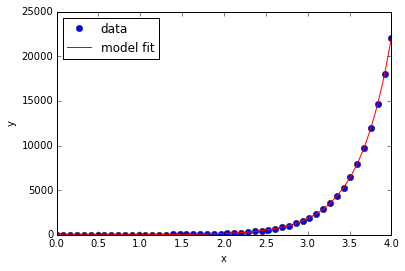

In [165]:
plt.plot(x, y, linestyle='' , marker='o', color='blue', label='data')
plt.plot(x, f(x, a, b, c), linestyle='-', color='red' , label='model fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc='upper left')

#### Uncertainties in Fit Parameters
How do we estimate the uncertainties in the fit parameters $\vec{a}=(a_1, a_2, \ldots, a_M)$?
* `scipy.optimize.curve_fit` returns:
  * `popt`: array
Optimal values for the parameters so that the sum of the squared error is minimized.
  * `pcov`: 2d array
The estimated covariance of `popt`. The diagonals provide the variance of the parameter estimate.
* The standard deviation of $a_i$ is $\sigma_i = \sqrt{C_{ii}}$.
  * The 68% confidence interval for $a_i$ is $\pm \sigma_i$.
  * The 95% confidence interval for $a_i$ is $\pm 2\sigma_i$.
  * etc.

#### Example: Nonlinear Curve Fitting, Continued
The results of the fit:

In [166]:
popt, pcov = scipy.optimize.curve_fit(f, x, yn)
for i in range(len(popt)):
    params = (i, popt[i], np.sqrt(pcov[i,i]))
    print('%d: %-8g +/- %g' % params)


NameError: name 'yn' is not defined

In [ ]:
print(pcov) 

In [ ]:
print(np.diag(pcov))